In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

# Bias-Variance Tradoff

I saw that there was some confusion surrounding Tuesday's lecture, so I made this notebook working through an example along the same lines as we discuessed in class (and appears in Bishop's book)

# Sine Example

First, we start with a sine curve, which we denote as $h(x)$. Professor Ghosh refered to this as our "ideal model". I like to think of it as the underlying distribution of our data, which in almost all situations we will not know.

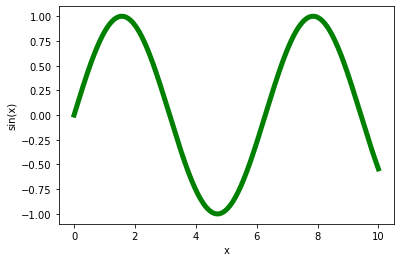

In [2]:
x_graph = np.linspace(0, 10, 5000)

plt.plot(x_graph, np.sin(x_graph), color = 'green', linewidth=5)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

What I want to do is look at some partuliar data points that come from this distibution. In class, we wrote:

$$t(x) = h(x) + \epsilon$$

where we assume $\epsilon \sim \mathcal{N}(0, \sigma^2)$, our normally distributed noise. Below, I have generated 25 such data points and set $\epsilon \sim \mathcal{N}(0, 1)$:

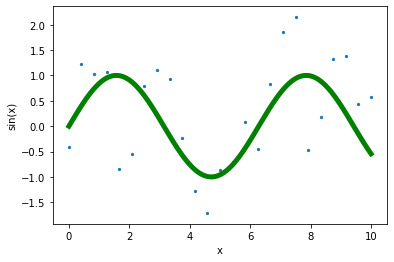

In [3]:
n = 25

x = np.linspace(0, 10, n)
t = (np.sin(x) + np.random.normal(0, 1, n))

plt.plot(x_graph, np.sin(x_graph), color = 'green', linewidth=5)
plt.scatter(x, t, s = 5)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

Realize that in reality, we wouldn't have this green sine curve to recognize what underlying structure is generation our values. We would just see:

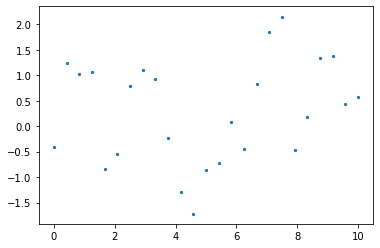

In [4]:
plt.scatter(x, t, s = 5)
plt.show()

and from this we would try to determine what type of underlying structure that the data has

## Fitting a model

In this example, we decided to try to model this data using a ninth-degree polynomial:

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lin = LinearRegression() 
poly = PolynomialFeatures(degree = 9)

x_poly = poly.fit_transform(x.reshape(-1, 1))
poly.fit(x_poly, t.reshape(-1, 1))
lin.fit(x_poly, t.reshape(-1, 1)) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

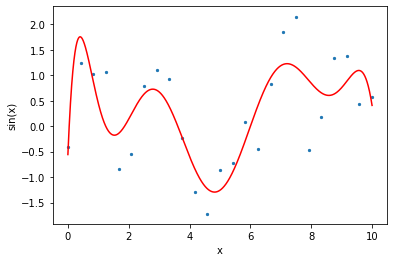

In [6]:
plt.scatter(x, t, s = 5)
plt.plot(x_graph, lin.predict(poly.fit_transform(x_graph.reshape(-1, 1))), color = 'red') 

plt.xlabel('x')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

## With repeated Datasets

Now that we have carried out the modeling process with one dataset, I would like to repeat this process with multiple datasets, each with 25 points. For the sake of clarity, I will graph 10 such data sets and their corresponding ninth order polynomial:

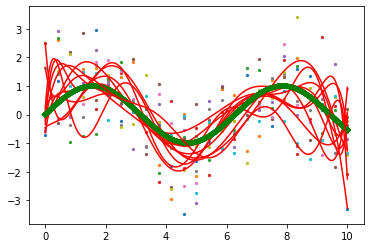

In [7]:
lin = LinearRegression() 
poly = PolynomialFeatures(degree = 9)

y_list = []
y_list_graph = []

t_list = []

for i in range(10):
    t = (np.sin(x) + np.random.normal(0, 1, n))
    t_list.append(t)
    
    plt.plot(x_graph, np.sin(x_graph), color = 'green', linewidth=5)
    plt.scatter(x, t, s = 5)

    x_poly = poly.fit_transform(x.reshape(-1, 1))
    poly.fit(x_poly, t.reshape(-1, 1))
    lin.fit(x_poly, t.reshape(-1, 1))
        
    y_graph = lin.predict(poly.fit_transform(x_graph.reshape(-1, 1)))
    y = lin.predict(poly.fit_transform(x.reshape(-1, 1)))
    
    y_list_graph.append(y_graph)
    y_list.append(y)

    plt.plot(x_graph, lin.predict(poly.fit_transform(x_graph.reshape(-1, 1))), color = 'red') 

plt.show()

What we see in the above plots is a total of 10 data sets, each with 25 points that differ from the underlying sine distribution by a normally distributed amount of noise.

## Model Average

Now that we have computed our model, we can use the average of these models to understand our balance between bias and variance

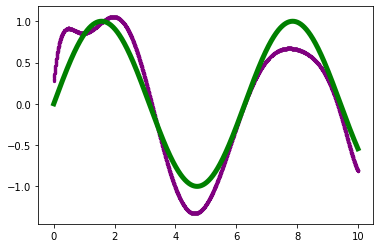

In [8]:
model_average_graph = np.mean(np.array(y_list_graph), axis = 0)
model_average = np.mean(np.array(y_list), axis = 0)

plt.scatter(x_graph, model_average_graph, s = 5, color = 'purple')
plt.plot(x_graph, np.sin(x_graph), color = 'green', linewidth=5)
plt.show()

## Bias-Variance Tradeoff

Let's look at this in more of a mathematical context. Across datasets $\mathcal{D}$ of a particuliar size, we have for our loss:

$\mathbb{E}_\mathcal{D}[\{y(x;\mathcal{D}) - h(x)\}^2]$

Which can be rewritten as:

$\{\mathbb{E}_\mathcal{D}[y(x;\mathcal{D})] - h(x)\}^2 + \mathbb{E}_\mathcal{D}[\{y(x;\mathcal{D}) - \mathbb{E}_\mathcal{D}[y(x;\mathcal{D})]\}^2]$

Let's look at the first term, which is our squared bias. Intuitively, this is the the squared difference between our models averaged given by the purple line and the underlying distribution given by the green sine curve. Below I have drawn this in blue: 

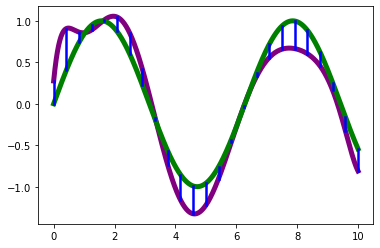

In [11]:
plt.plot(x_graph, model_average_graph, linewidth=5, color = 'purple')
plt.plot(x_graph, np.sin(x_graph), color = 'green', linewidth=5)

for i in range(len(x)):
    plt.plot([x[i],x[i]], [np.sin(x[i]),model_average[i]], color = 'blue', linewidth=2.5)

plt.show()

In this example, you can see that I uniformly distributed our x values so that we do not have to consider the distribution of x in our calulation of the bias-variance tradeoff

The second term is our variance, which intuitively is the (average) difference between the individual predictions of our model and our model average. Below I have ploted this difference for each dataset:

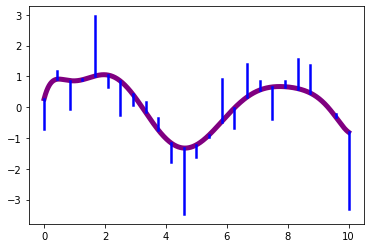

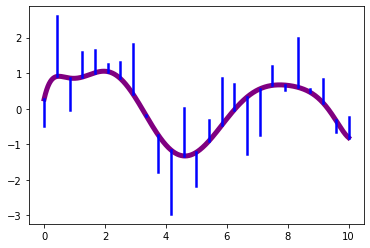

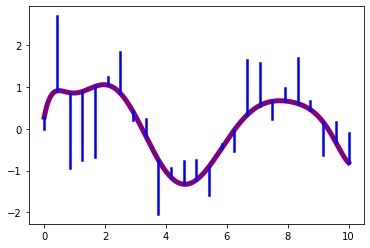

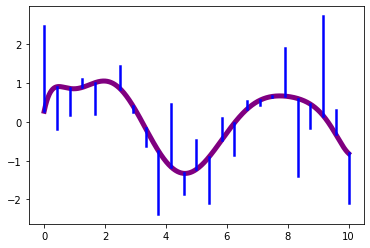

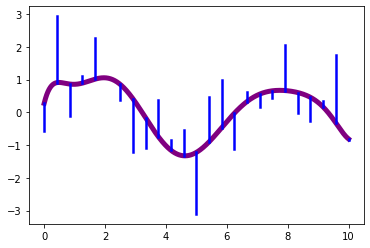

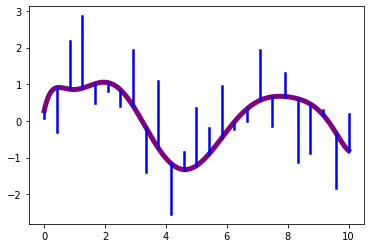

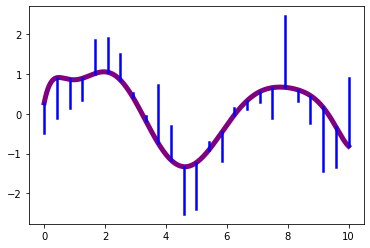

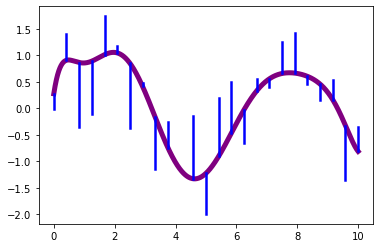

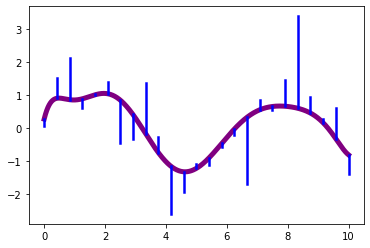

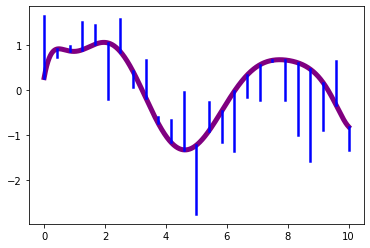

In [38]:
for j in range(10):
    plt.plot(x_graph, model_average_graph, linewidth=5, color = 'purple')
    for i in range(25):
        plt.plot([x[i],x[i]], [t_list[j][i],model_average[i]], color = 'blue', linewidth=2.5)
    plt.show()